In [20]:
# CHANGE GENERATOR TO GENERATE BEFORE USING UNIT IN THS SHELL SCRIPT
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import math
import subprocess

In [28]:
# Reading csv files

# 1: image file name
# 2-5: detected optic disc bounding box coordinates, i.e., [x1, y1, x2, y2]
# 6-9: detected optic cup bounding box coordinates, i.e., [x1, y1, x2, y2]
# 10: confidence score for the detected optic disc bounding box 
# 11: confidence score for the detected optic cup bounding box
# 12: image quality assessment output score
# 13: image quality assessment results, where 1 indicates good quality and 0 otherwise. 
#     The threshold is set to be 0.5 here.

db = 'KAGGLE'
infoTrain = pd.read_csv('./info2crop/' + db + '/train.csv', sep=',', header=None) 
infoTest = pd.read_csv('./info2crop/' + db + '/test.csv', sep=',', header=None) 

infoAux = [infoTrain, infoTest]
info = pd.concat(infoAux)
#print(info)


In [67]:
names = info.iloc[:,0].tolist()
#print(names)

# x1, y1 is the center
# make the execution secure. There are some values equal to zero. Maybe checking the quality assessment value
x1 = info.iloc[:,1].tolist()
y1 = info.iloc[:,2].tolist()
x2 = info.iloc[:,3].tolist()
y2 = info.iloc[:,4].tolist()
scoreQ = info.iloc[:,11].tolist()
scoreOD = info.iloc[:,9].tolist()
print(len(y2))

88702


Quality score0.5321
OD score1.0


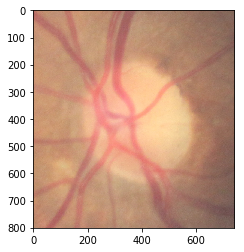

Quality score0.5873
OD score1.0


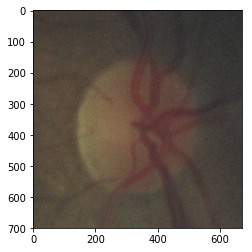

Quality score0.3572
OD score1.0


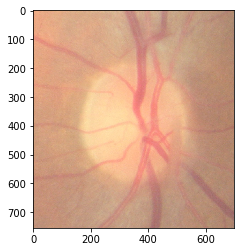

Quality score0.3242
OD score1.0


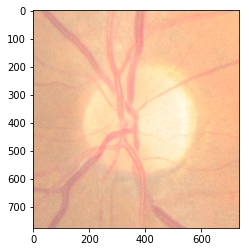

Quality score0.5497
OD score1.0


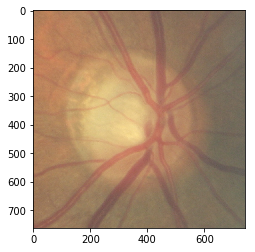

In [68]:
for i in range(5):
    status = subprocess.call("cp " + '../DCGAN_UNIT_baseline/S3_bucket/images2crop/' + db + '/' + names[i] \
                             + " /home/cvblab03/Documents/GANexperiment/jupyterScripts/", shell=True)
    im = cv2.imread(namesTrain[i])
    #print(im.shape)
    
    status = subprocess.call("rm /home/cvblab03/Documents/GANexperiment/jupyterScripts/" + names[i], shell=True)
    
    print('Quality score ' + str(scoreQ[i]))
    print('OD score ' + str(scoreOD[i]))

    # plotting im  
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    #plt.imshow(im)
    #plt.show()

    rad = math.hypot(x2[i] - x1[i], y2[i] - y1[i])/3 # Linear distance 

    imCrop = im[int(y1[i]-rad):int(y2[i]+rad), int(x1[i]-rad):int(x2[i]+rad),:]
    #print(imCrop.shape)

    # plotting cropped im 
    imCrop = cv2.cvtColor(imCrop, cv2.COLOR_RGB2BGR)
    plt.imshow(imCrop)
    plt.show()
        
    # Saving cropped images
    imCrop = cv2.cvtColor(imCrop, cv2.COLOR_RGB2BGR)
    cv2.imwrite('cropped_' + names[i], imCrop)
    
    status = subprocess.call("mv /home/cvblab03/Documents/GANexperiment/jupyterScripts/cropped_" + names[i] + \
                             " ../DCGAN_UNIT_baseline/S3_bucket/imagesCropped/" + db + "/", shell=True)
